In [193]:
import pandas as pd;
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [194]:
df = pd.read_csv("titanic.csv")

In [ ]:
print(df.sample(5))
print(df.head())
print(df.tail())

In [196]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [197]:
df = df.drop('PassengerId',axis=1)
df = df.drop('Name',axis=1)
df = df.drop('Ticket',axis=1)

In [198]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [199]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Cabin']=df['Cabin'].ffill()
df['Embarked']=df['Embarked'].ffill()
df['Cabin'].fillna(df['Cabin'].mode()[0],inplace=True)


In [201]:
df.size

8019

In [202]:
df.shape

(891, 9)

In [203]:
df['Sex'] = df['Sex'].astype('category')
df['Sex'] = df['Sex'].cat.codes

df['Embarked'] = df['Embarked'].astype('category')
df['Embarked'] = df['Embarked'].cat.codes

In [204]:
from sklearn.preprocessing import MaxAbsScaler
df[['Age', 'Fare']] = MaxAbsScaler().fit_transform(df[['Age', 'Fare']])


In [205]:
df.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
520,1,1,0,0.37500,0,0,0.182500,B73,2
525,0,3,1,0.50625,0,0,0.015127,B18,1
583,0,1,1,0.45000,0,0,0.078319,A10,0
783,0,3,1,0.35000,1,2,0.045771,D6,2
780,1,3,0,0.16250,0,0,0.014110,B3,0
634,0,3,0,0.11250,3,2,0.054457,B50,2
433,0,3,1,0.21250,0,0,0.013907,C52,2
173,0,3,1,0.26250,0,0,0.015469,B19,2
328,1,3,0,0.38750,1,1,0.040062,D,2
285,0,3,1,0.41250,0,0,0.016908,A19,0


 Single Variable Histograms (Numerical Columns)

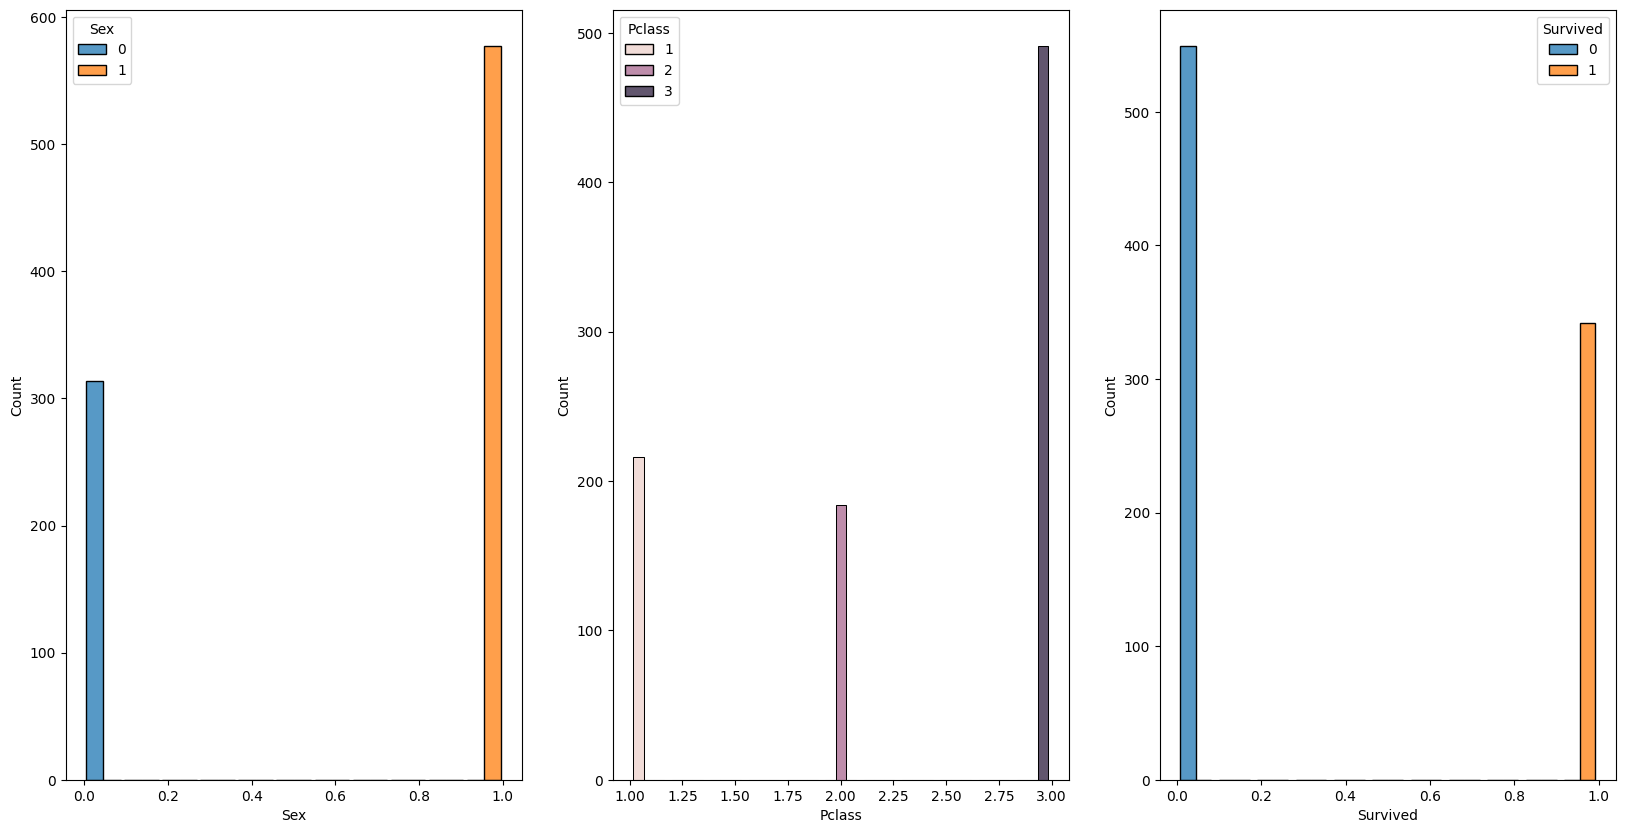

In [223]:
fig, axis = plt.subplots(1,3,figsize=(20,10))
sns.histplot(ax = axis[0], data = df, x='Sex', hue = 'Sex', multiple = 'dodge', shrink = 0.9)
sns.histplot(ax = axis[1], data = df, x='Pclass', hue = 'Pclass',multiple = 'dodge', shrink = 0.8)
sns.histplot(ax = axis[2], data = df, x='Survived', hue = 'Survived', multiple = 'dodge', shrink = 0.8)
plt.show()


Two-Variable Histograms (Categorical x Survived)

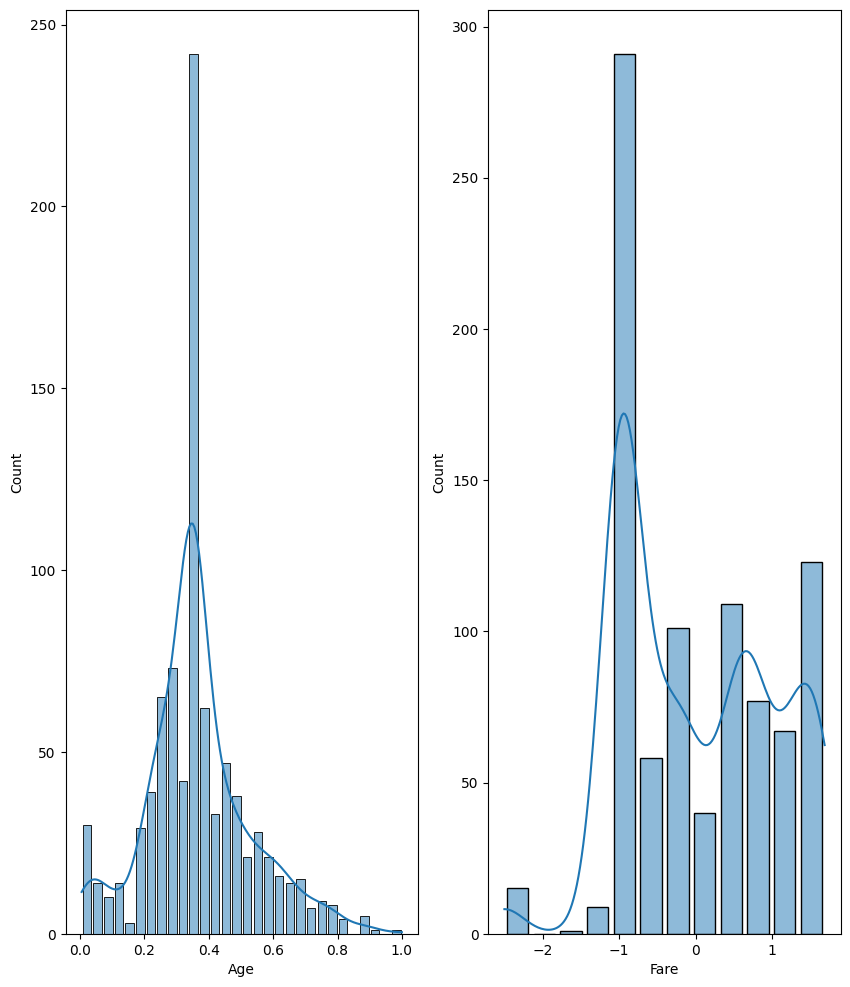

In [224]:
fig, axis = plt.subplots(1,2,figsize=(10,12))
sns.histplot(ax = axis[0], data = df, x='Age', multiple = 'dodge', shrink = 0.8, kde = True)
sns.histplot(ax = axis[1], data = df, x='Fare', multiple = 'dodge', shrink = 0.8, kde = True)
plt.show()


Two-Variable Histograms (Sex vs Age/Fare and Survived vs Age/Fare)

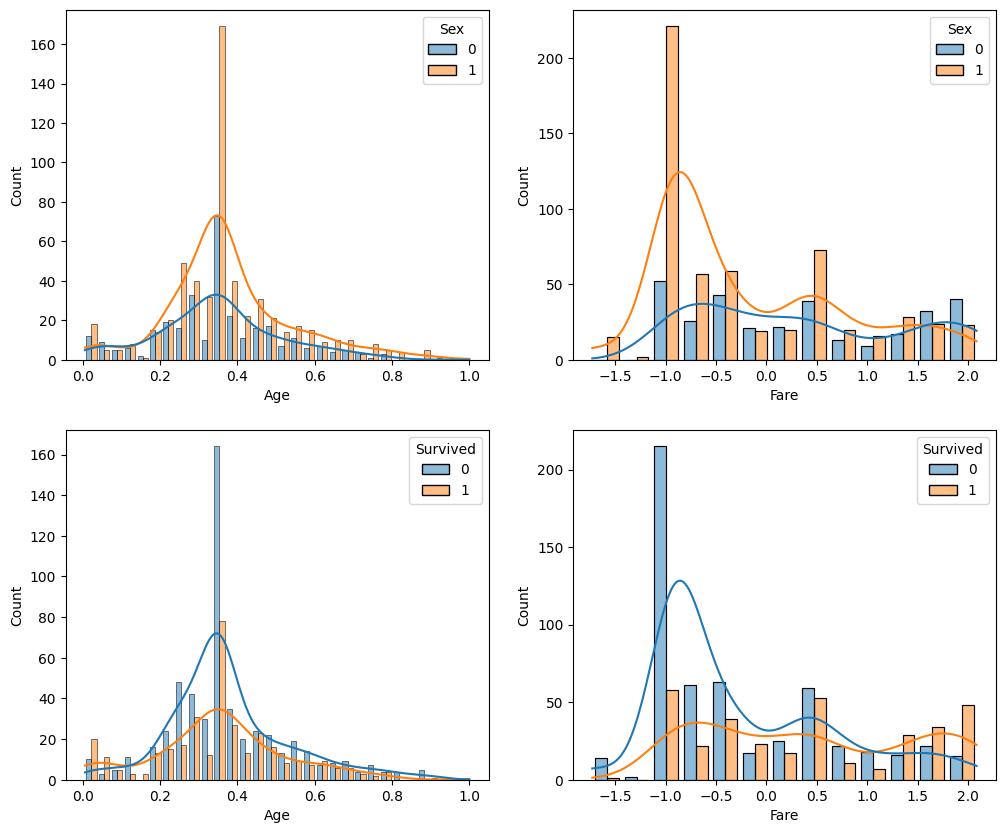

In [214]:
fig, axis = plt.subplots(2,2,figsize=(12, 10))
sns.histplot(ax = axis[0,0], data = df, x='Age', hue = 'Sex', multiple = 'dodge', shrink = 0.8, kde = True)
sns.histplot(ax = axis[0,1], data = df, x='Fare', hue = 'Sex', multiple = 'dodge', shrink = 0.8, kde = True)
sns.histplot(ax=axis[1,0], data = df, x='Age', hue = 'Survived', multiple = 'dodge',shrink=0.8, kde= True)
sns.histplot(ax = axis[1,1], data = df, x='Fare', hue='Survived', multiple='dodge', shrink=0.8, kde = True)
plt.show()


PowerTransformer is used for making skewed data more normal

In [215]:
from sklearn.preprocessing import PowerTransformer
pow = PowerTransformer();
df['Fare'] = pow.fit_transform(df['Fare'].values.reshape(-1,1));

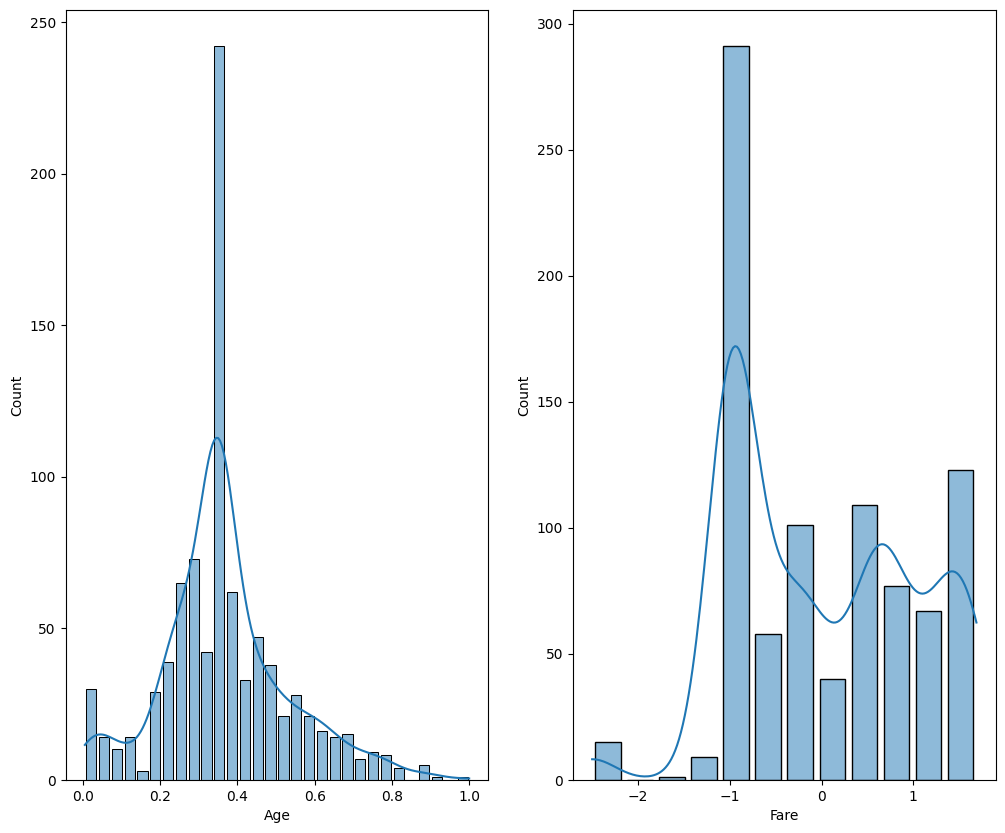

In [216]:
fig, axis = plt.subplots(1,2,figsize=(12, 10))
sns.histplot(ax = axis[0], data = df, x='Age', multiple = 'dodge', shrink = 0.8, kde = True)
sns.histplot(ax = axis[1], data = df, x='Fare', multiple = 'dodge', shrink = 0.8, kde = True)
plt.show()

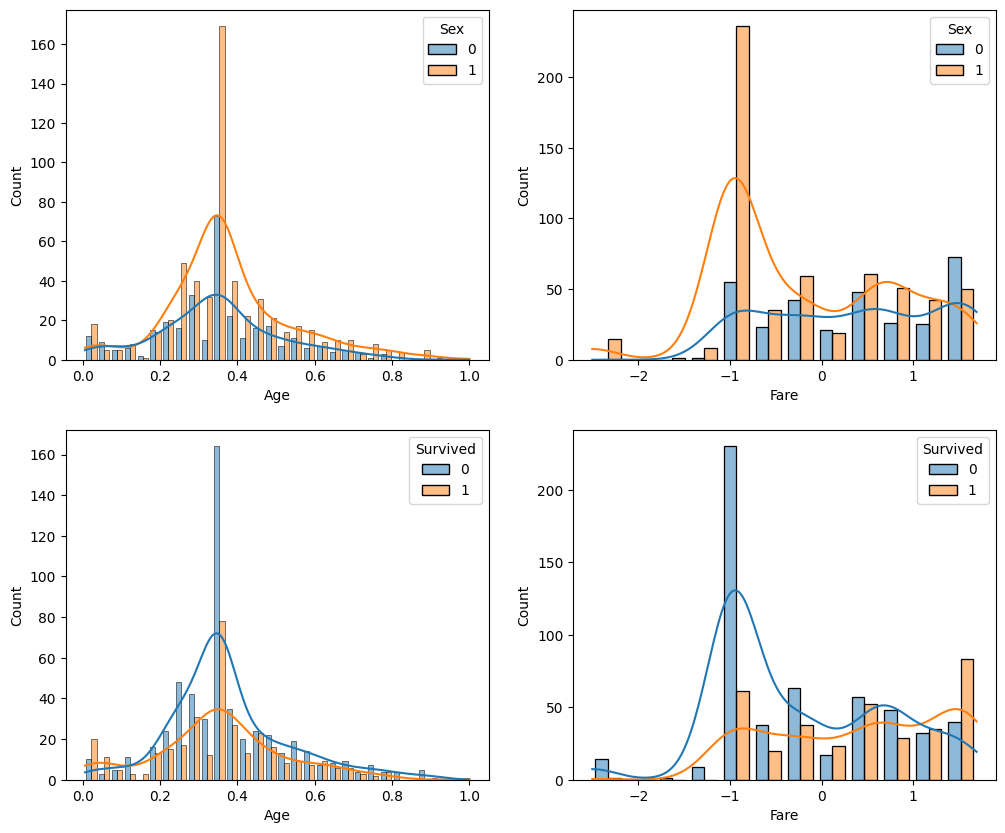

In [217]:
fig, axis = plt.subplots(2,2,figsize=(12, 10))
sns.histplot(ax = axis[0,0], data = df, x='Age', hue = 'Sex', multiple = 'dodge', shrink = 0.8, kde = True)
sns.histplot(ax = axis[0,1], data = df, x='Fare', hue = 'Sex', multiple = 'dodge', shrink = 0.8, kde = True)
sns.histplot(ax=axis[1,0], data = df, x='Age', hue = 'Survived', multiple = 'dodge',shrink=0.8, kde= True)
sns.histplot(ax = axis[1,1], data = df, x='Fare', hue='Survived', multiple='dodge', shrink=0.8, kde = True)
plt.show()


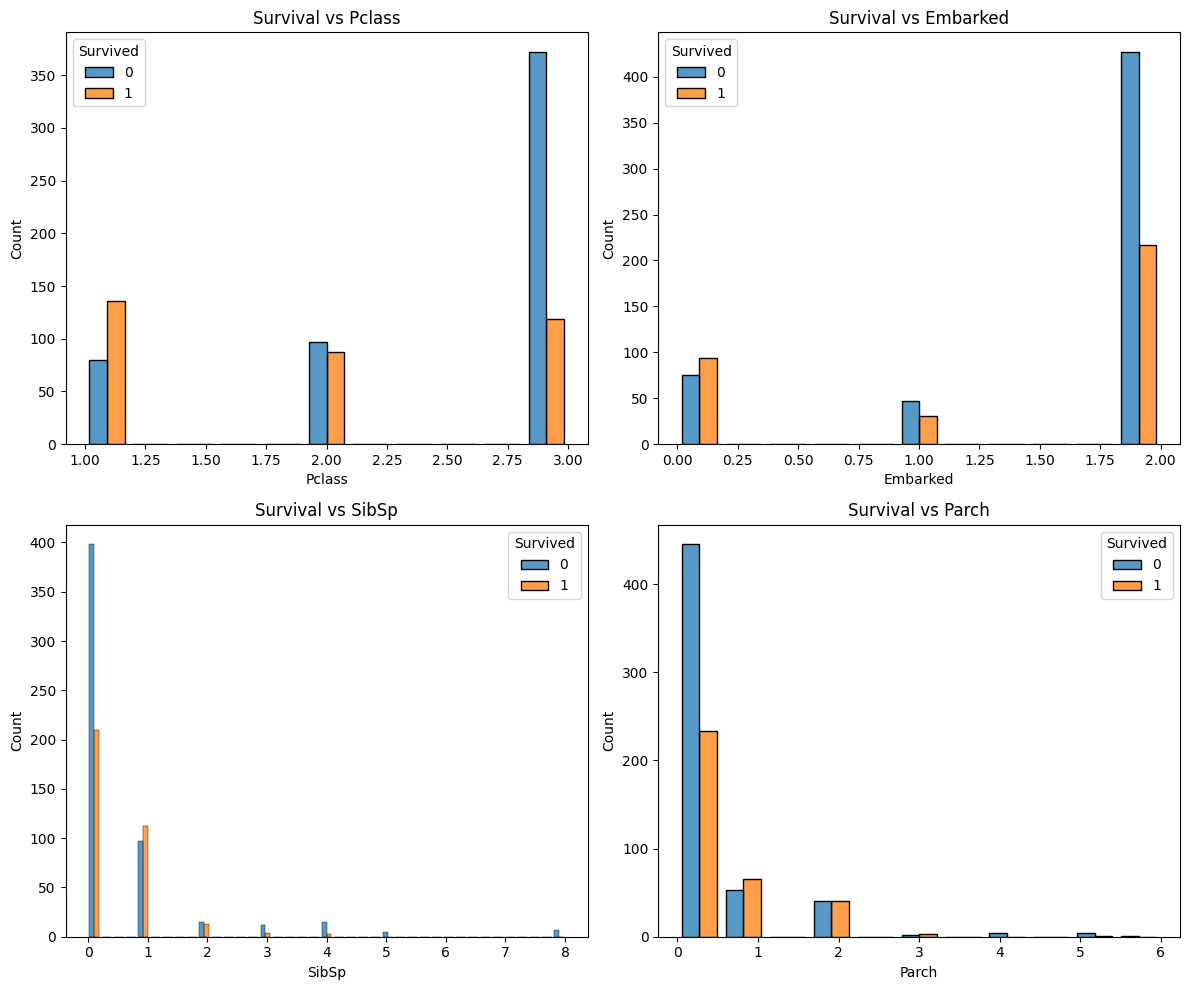

In [212]:
fig, axis = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(ax=axis[0,0], data=df, x='Pclass', hue='Survived', multiple='dodge', shrink=0.8, kde=False)
axis[0,0].set_title("Survival vs Pclass")

sns.histplot(ax=axis[0,1], data=df, x='Embarked', hue='Survived', multiple='dodge', shrink=0.8, kde=False)
axis[0,1].set_title("Survival vs Embarked")

sns.histplot(ax=axis[1,0], data=df, x='SibSp', hue='Survived', multiple='dodge', shrink=0.8, kde=False)
axis[1,0].set_title("Survival vs SibSp")

sns.histplot(ax=axis[1,1], data=df, x='Parch', hue='Survived', multiple='dodge', shrink=0.8, kde=False)
axis[1,1].set_title("Survival vs Parch")

plt.tight_layout()
plt.show()




# Observations: Feature vs Survived

---

### 1. **Sex vs Survived**
- **Females** survived **much more** than males.
- Almost **3 out of 4 females** survived.
- Only about **1 out of 5 males** survived.
- **→ "Women and children first"** policy clearly visible!

---

### 2. **Pclass vs Survived**
- **First class (Pclass = 1)** passengers had the **highest survival rate**.
- **Second class** had moderate survival.
- **Third class** had **lowest survival** — many third-class passengers did **not survive**.
- **→ Rich passengers had better chances.**

---

### 3. **Age vs Survived**
- **Young children (Age < 10)** had better survival rates.
- Adults between **20–40** had mixed survival (depends on other factors like class, sex).
- **Elderly (>60)** mostly did **not survive**.
- **→ Young children were prioritized**, but age alone wasn't the strongest factor.

---

### 4. **Fare vs Survived**
- People who paid **higher fares** had **higher survival rates**.
- Passengers with **lower fares** (likely 3rd class) had lower survival.
- **→ Fare is indirectly related to Pclass**.

---

### 5. **Embarked vs Survived**
- Passengers who **embarked from 'C' (Cherbourg)** had **higher survival**.
- Passengers from 'S' (Southampton) had **lower survival**.
- **→ Cherbourg had richer passengers**, who were more likely in first class.

---

### 6. **SibSp (Siblings/Spouses Aboard) vs Survived**
- Having **1 or 2** siblings/spouses aboard increased survival chance.
- Passengers **alone (SibSp = 0)** had **lower survival**.
- Too many siblings (>3) reduced survival.
- **→ Small families stuck together and survived better.**

---

### 7. **Parch (Parents/Children Aboard) vs Survived**
- Passengers with **1–2 parents/children** had **better survival rates**.
- Those **traveling alone** (Parch = 0) had **lower survival**.
- **Large families (Parch >3)** had low survival.
- **→ Being with parents or kids helped.**

---

# Summary:

| Feature        | Survived more if...            |
|----------------|--------------------------------|
| Sex            | Female                         |
| Pclass         | 1st Class                      |
| Age            | Children (<10 years)           |
| Fare           | Paid higher fare               |
| Embarked       | From Cherbourg ('C')           |
| SibSp          | 1–2 siblings/spouses           |
| Parch          | 1–2 parents/children           |

